# **Music Recommendation System**

## **Milestone 1**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?


## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. **There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise**. 

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. **Please consider the code provided in this notebook as a sample code.**

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

### **Importing Libraries and the Dataset**

In [3]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [5]:
#importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/song_data.csv')

### **Understanding the data by viewing a few observations**

In [6]:
# See top 10 records of count_df data
count_df.head(10)

,user_id,song_id,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [22]:
count_df.info()
count_df.describe()
print('\nNumber of user id NAs:', count_df.user_id.isna().sum())
print('\nNumber of song id NAs:', count_df.song_id.isna().sum())
print('\nNumber of play count NAs:', count_df.play_count.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1048575 non-null  object
 1   song_id     1048575 non-null  object
 2   play_count  1048575 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 32.0+ MB

Number of user id NAs: 0

Number of song id NAs: 0

Number of play count NAs: 0


In [7]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


In [19]:
song_df.info(10)
song_df.describe()
print('\nNumber of song_id NAs:', song_df.song_id.isna().sum())
print('\nNumber of title NAs:', song_df.title.isna().sum())
print('\nNumber of release NAs:', song_df.release.isna().sum())
print('\nNumber of artist name NAs:', song_df.artist_name.isna().sum())
print('\nNumber of year NAs:', song_df.year.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB

Number of song_id NAs: 0

Number of title NAs: 15

Number of release NAs: 5

Number of artist name NAs: 0

Number of year NAs: 0


### **Let us check the data types and and missing values of each column**

#### **Observations and Insights: **

**count_df dataset**
- Number of rows: 1048575.
- There are not null or NA values.
- Mean of the play count: 3.05 aprox.

**song_df dataset**
- Number of rows: 1000000.
- There are not null values, but thjere are some missing values.
- Year: 0 (min, invalid year) to 2011 (max year).
- There are 6 missing releases and 15 titles missing.

It's considered only songs listened by at least 120 users, then select songs wuich has been listener 5 or more times. There are a total of more than 1500 songs which matchs that criterias.

Total number of unique songs is 185.
Total number of artist is 72665.

In [24]:
# Display total number of unique song_id
count_df.song_id.nunique()


10000

In [25]:
# Display total number of unique artists
song_df.artist_name.nunique()

72665

It's considered only songs listened by at least 120 users, then select songs wuich has been listener 5 or more times. There are a total of more than 1500 songs which matchs that criterias.


- Total number of unique songs is 185.
- Total number of artist is 72665.

In [26]:
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")
#df = df.drop(['Unnamed: 0'],axis=1) #does not find any column with that name, does not exist
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1048570,6b4d326415bae31ca8e7c25d9f966f72d09802cc,SODCIML12A6D4FADF9,1,Axel F (Radio Edit),Axel F,Crazy Frog,2005
1048571,6b4d326415bae31ca8e7c25d9f966f72d09802cc,SOFRQTD12A81C233C0,4,Sehr kosmisch,Musik von Harmonia,Harmonia,0
1048572,6b4d326415bae31ca8e7c25d9f966f72d09802cc,SOLFXKT12AB017E3E0,3,Fireflies,Karaoke Monthly Vol. 2 (January 2010),Charttraxx Karaoke,2009
1048573,6b4d326415bae31ca8e7c25d9f966f72d09802cc,SONIFJR12A6702187A,1,Every Planet We Reach Is Dead,Demon Days,Gorillaz,2005


In [27]:
#label encoding code
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['user_id'] = le.fit_transform(df['user_id']) 

df['song_id'] = le.fit_transform(df['song_id'])

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

In [28]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [29]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [30]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [31]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [33]:
#the songs count cutoff is not selected as "corrected" on assitance
df_final=df_final[df_final.play_count<=5]

In [34]:
count_user_interactions = df.groupby('user_id').count().sort_values(['play_count'], ascending=False)
count_song_interactions = df.groupby('song_id').count().sort_values(['play_count'], ascending=False)
print('User interactios (user, number of play count):\n\n', count_user_interactions)
print('Song interactions (song, number of play count):\n\n', count_song_interactions)

#data not correct, same value for every row

User interactios (user, number of play count):

          song_id  play_count  title  release  artist_name  year
user_id                                                        
17084        711         711    711      711          711   711
12197        556         556    556      556          556   556
4047         533         533    533      533          533   533
27759        523         523    523      523          523   523
12458        478         478    478      478          478   478
...          ...         ...    ...      ...          ...   ...
3709          90          90     90       90           90    90
20125         90          90     90       90           90    90
22128         90          90     90       90           90    90
34911         90          90     90       90           90    90
16425         90          90     90       90           90    90

[1680 rows x 6 columns]
Song interactions (song, number of play count):

          user_id  play_count  title  release

It's considered songs which have been listener 5 or more times. There are a total of more than 1500 songs which matchs that criteriias.
The user with more interactions (song counts) is user_id 25739, song_id 16 with 16 songs listened.
The song with more interactions (song counts) is song_id 1664 with user id 30 with 30 rating counts.

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [35]:
df_final['user_id'].nunique()

1659

Total number of unique song id

In [36]:
df_final['song_id'].nunique()

186

Total number of unique artists

In [37]:
df_final['artist_name'].nunique()

129

#### **Observations and Insights:**

It's considered only songs wuich has been listener 5 or more times. There are a total of more than 1500 songs which matchs that criterias.

- Total number of unique songs is 186.
- Total number of ubique users is 1659.
- Total number of artist names: 129.


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [38]:
df_final['title'].value_counts()

Dog Days Are Over (Radio Edit)    389
Use Somebody                      381
Sehr kosmisch                     372
The Scientist                     341
Clocks                            336
                                 ... 
Fuck Kitty                         96
A Beggar On A Beach Of Gold        94
Mercy:The Laundromat               87
Sinisten tähtien alla              86
Almaz                              85
Name: title, Length: 186, dtype: int64

Most interacted users

In [39]:
df_final['user_id'].value_counts()

8198     141
4718     136
19480    133
34926    133
8261     130
        ... 
3669       1
17976      1
12384      1
217        1
25139      1
Name: user_id, Length: 1659, dtype: int64

Songs played in a year

In [40]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,1218
2007,2148
2008,3703
2009,5991
2010,1605


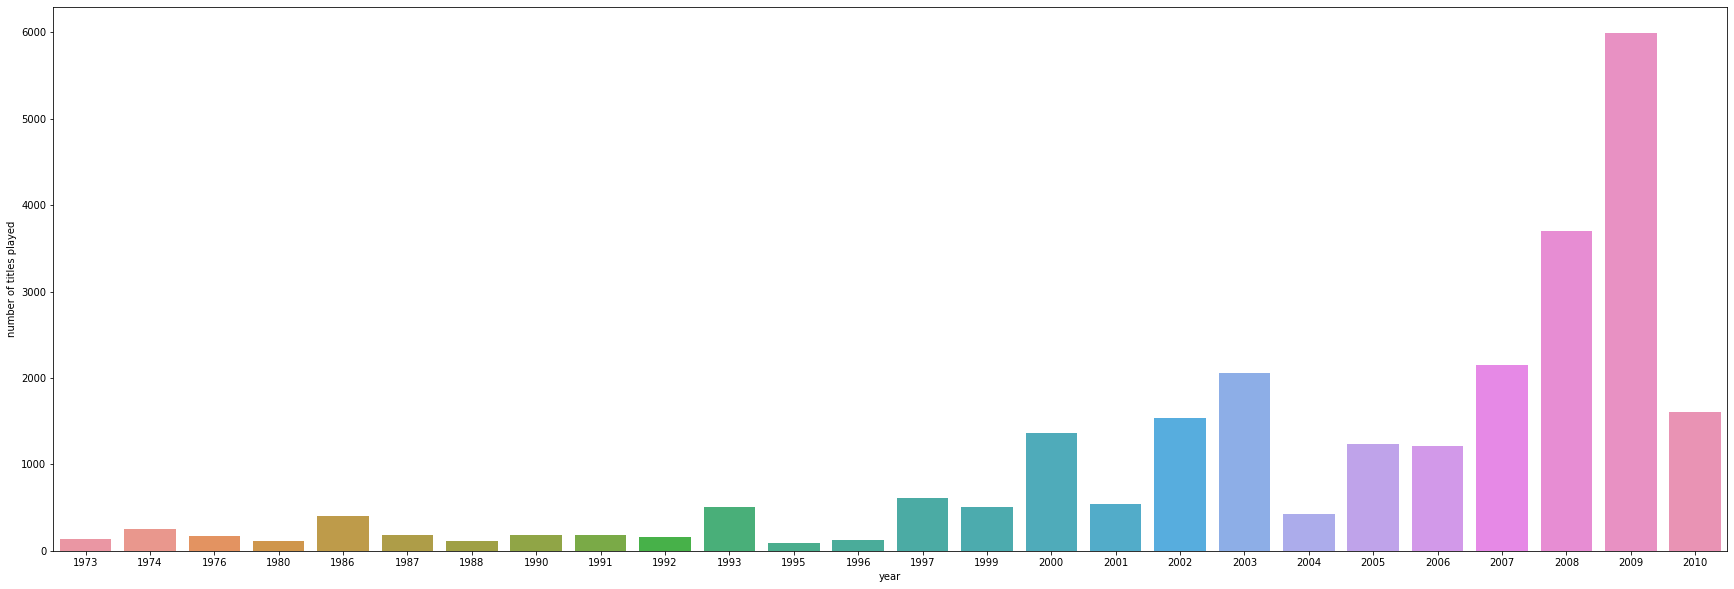

In [41]:
# Create the plot

# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('number of titles played') 

# Show the plot
plt.show()

#### **Observations and Insights: ** # 

- The 2009 year it's the year with most songs listened, with almost 6000 plays.

- It's seen that the count of play songs with the year is growing increasingly with the year, except for the last one which is 2010 (whe the data was captured for sure).

**Think About It:** What other insights can be drawn using exploratory data analysis?

## **Proposed approach**
**Potential techniques:** What different techniques should be explored?<br>
**Overall solution design:** What is the potential solution design?<br>
**Measures of success:** What are the key measures of success to compare different potential technqiues?<br>



## **Proposed approach**

For the present case precision@10 can be interpreted as the fraction of the 10 recommended songs that are actually liked/listened by the user.

**Potential techniques:** What different techniques should be explored?<br>
**Overall solution design:** What is the potential solution design?<br>
**Measures of success:** What are the key measures of success to compare different potential technqiues?<br>



**Potential techniques:**

- It could be use this set of techniques to recommend effectively music to users based on the song listening count history data (recommend what their neighbors and neighbors of neighbors listen to, to match their musical tasted and get satisfied with the music recommendation service):



- Knowledge/Rank based recommendation system.
- Similarity-Based Collaborative filtering.
- Matrix Factorization Based Collaborative Filtering.


- The GridSearchCV algorithm is used to tune the best set of hyperparameters among the given music information. This requires training the model with each possible set of hyperparameters and hence training multiple models, which takes more time to run the algorithm.


**Overall solution design:**

- In the final dataset, the number of songs with play_counts more than 5 is very low (185), which will result in an extremely sparse user-item interaction matrix. This will also increase the size of the matrix, which will make building a recommendation system model computationally expensive. Hence, all such songs are removed from the data.



- The model it must take care of the processing time and the data storage capacity due to the fact to the sparse matrix of the problem. It would be wise to store the mode in a python object named picle, to avoid scalability and efficiency issues.


**Measures of sucess:**

- Precisionm with k = 5 is a modified performance assessment metric for recommendation systems. Here, k is the number of items (songs here) recommended to a user. 



- In this case precision with k=5 can be interpreted as the fraction of the 5 recommended songs that are actually listened by an user. Let's suppose the user listens to 1 song then precision with k = 5 will 1/5, i.e., 0.2 (20%).



- Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance. As it's desired to recommend positively songs to the user (not very high of false negatives, which is songs that are recommended by the system which the user does not like). Thus, the precision is not considered so important. Of course, precision needs to be taking into account (or ther would be more false positives, meaning that the user miss many music which he likes, but with so many music this is not as important). Finally it could be use the F1 score to get a good balance between precision and recall.